In [408]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt 

import seaborn as sns

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [409]:
# reading the CSV file into pandas dataframe
Iris_data = pd.read_csv("iris.csv") 
Iris_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,115,5.8,2.8,5.1,2.4,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
23,24,5.1,3.3,1.7,0.5,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [410]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [411]:
#Drop the ID column as it is not required for our analysis.
Iris_data = Iris_data.drop('Id',1)

In [412]:
Iris_data.isna().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [413]:
Iris_data.fillna(Iris_data.median(), inplace=True)
Iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Observations:
### There were about total 6 NAN values in the dataset. It is treated and replaced with median value of that column.

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [414]:
#Iris_data['Species'] = Iris_data['Species'].astype('category')
#pd.get_dummies(Iris_data['Species'], drop_first=True)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=Iris_data['Species']
le.fit(data.values)
Iris_data['Species']=le.transform(Iris_data['Species'])

Iris_data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,0
27,5.2,3.5,1.5,0.2,0
134,6.1,2.6,5.6,1.4,2
65,6.7,3.1,4.4,1.4,1
63,6.1,2.9,4.7,1.4,1
128,6.4,2.8,5.6,2.1,2
77,6.7,3.0,5.0,1.7,1
90,5.5,2.6,4.4,1.2,1
138,6.0,3.0,4.8,1.8,2
104,6.5,3.0,5.8,2.2,2


In [415]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Observations:
### We have categorical data in the Species columns. So the datas are replaced using Label Encoder and converted to numeric values for better manipulation.

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

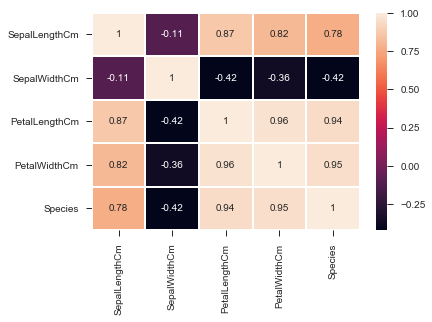

In [416]:
sns.heatmap(Iris_data.corr(), annot=True, linewidths=1)

In [417]:
CorrMat = Iris_data.corr()
CorrMat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


In [418]:
Iris_data[Iris_data.columns[:]].corr()['Species'][:-1]

SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Name: Species, dtype: float64

## Observation
### There is no feature set having correlation in range -0.1 to 0.1 with the target variable. 
### All the features have strong correlation with the target variable.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [419]:
VarMat = Iris_data.var()
VarMat

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

## Observation
### All the independent variables have variance > 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

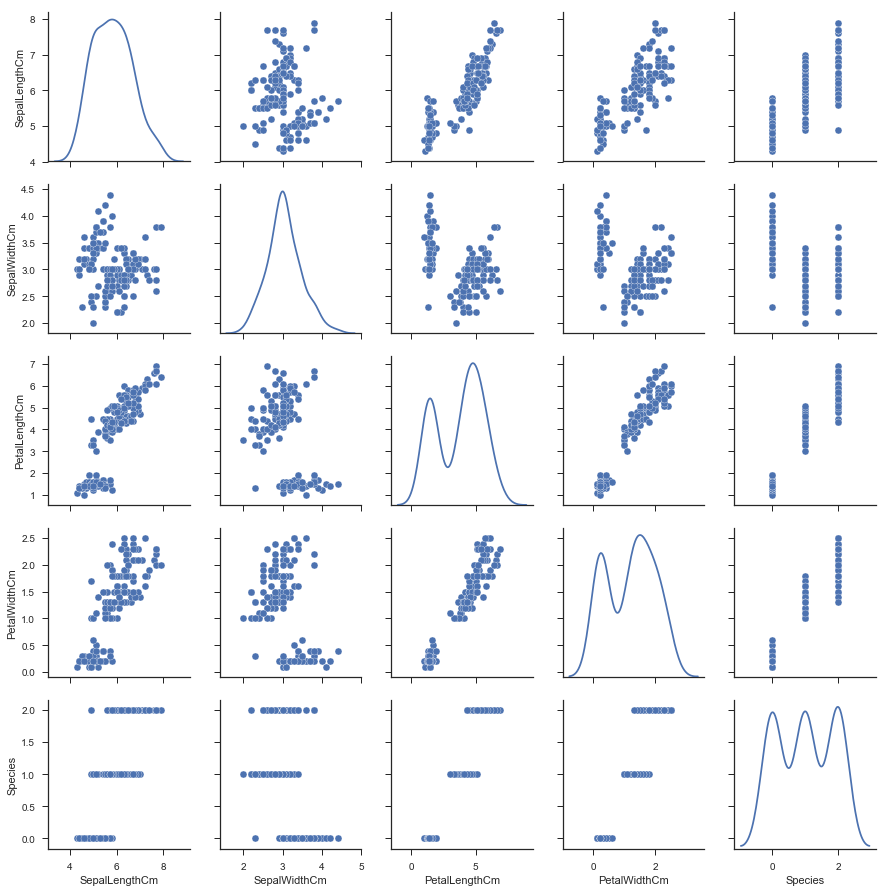

In [420]:
sns.pairplot(Iris_data, diag_kind='kde',kind='scatter')

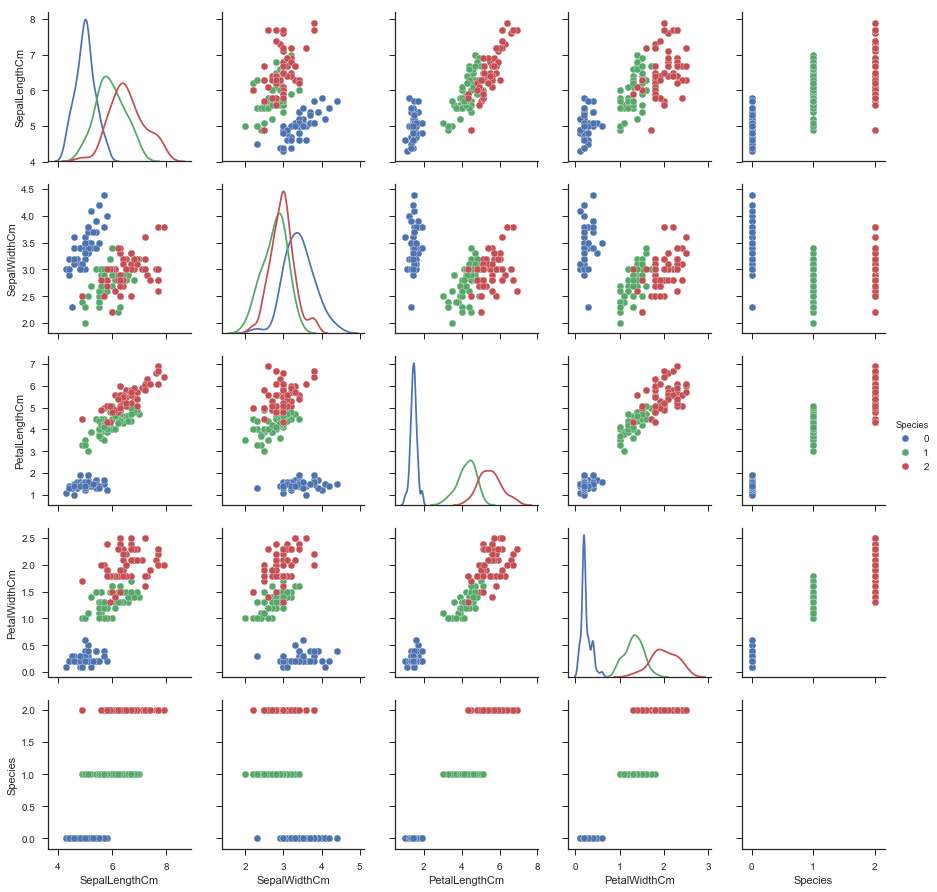

In [421]:
sns.pairplot(Iris_data, diag_kind='kde', hue="Species", kind='scatter')

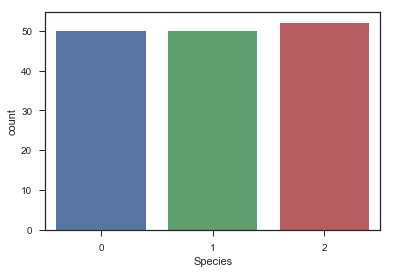

In [422]:
sns.countplot(Iris_data['Species'])

In [423]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ", indices)

There is significant positive correlation between the following attributes:  [('SepalLengthCm', 'PetalLengthCm'), ('SepalLengthCm', 'PetalWidthCm'), ('SepalLengthCm', 'Species'), ('PetalLengthCm', 'PetalWidthCm'), ('PetalLengthCm', 'Species'), ('PetalWidthCm', 'Species')]


In [424]:
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant negative correlation between the following attributes: ", indices)

There is significant negative correlation between the following attributes:  [('SepalLengthCm', 'SepalWidthCm'), ('SepalWidthCm', 'PetalLengthCm'), ('SepalWidthCm', 'PetalWidthCm'), ('SepalWidthCm', 'Species')]


## Observation:
###   The attributes SepalLength, SepalWidth looks normally distributed.
###   The attributes PetalLength, PetalWidth have multimodal distribution.
###   The Species data have equally distributed datas in all species category. So there will be no bias towards a particualr species category.

### Based on the correlation matrix and the pair plot: have listed the relationship (negative correlation, positive correlation) between attributes in above cells output.

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [425]:
from sklearn.model_selection import train_test_split
X = Iris_data.iloc[:, 0:-1]
Y = Iris_data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [426]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K = [3,5,9]
AccuracyScore = []

for n in K:
    IrisKNN = KNeighborsClassifier(n_neighbors= n , weights = 'uniform', metric='euclidean')
    IrisKNN.fit(X_train, Y_train)
    predicted_labels = IrisKNN.predict(X_test)
    AccuracyScore.append( accuracy_score(Y_test, predicted_labels) ) 

# combine the K value and accuracy score into a dataframe to print
AccuracyScore_df = pd.DataFrame( { "K_Vaue":K, "Accuracy_Score": AccuracyScore} )
AccuracyScore_df

,K_Vaue,Accuracy_Score
0,3,0.935484
1,5,0.935484
2,9,0.935484


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [427]:
K = np.arange(1,21,2)
AccuracyScore = []
MissclassificationError = []

for n in K:
    IrisKNN = KNeighborsClassifier(n_neighbors= n , weights = 'uniform', metric='euclidean')
    IrisKNN.fit(X_train, Y_train)
    predicted_labels = IrisKNN.predict(X_test)
    AccScore = accuracy_score(Y_test, predicted_labels)
    MSE = 1 - AccScore
    AccuracyScore.append(AccScore) 
    MissclassificationError.append(MSE) 

# combine the K value and accuracy score into a dataframe to print
Validation_df = pd.DataFrame( { "K_Value":K, "Accuracy_Score": AccuracyScore, "MSE": MissclassificationError} )
Validation_df

,K_Value,Accuracy_Score,MSE
0,1,0.935484,0.064516
1,3,0.935484,0.064516
2,5,0.935484,0.064516
3,7,0.967742,0.032258
4,9,0.935484,0.064516
5,11,0.903226,0.096774
6,13,0.903226,0.096774
7,15,0.935484,0.064516
8,17,0.967742,0.032258
9,19,0.935484,0.064516


In [428]:
# To get the modal with lowest MSE
MinMSE = Validation_df['MSE'].min()
Validation_df[(Validation_df['MSE'] == MinMSE)]

,K_Value,Accuracy_Score,MSE
3,7,0.967742,0.032258
8,17,0.967742,0.032258


In [429]:
# Necessary imports: for a k fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict

IrisKNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'uniform', metric='euclidean')
IrisKNN.fit(X_train, Y_train)

# Perform 10-fold cross validation
scores = cross_val_score(IrisKNN, X_test, Y_test, cv=10)
print('Cross-validated scores:', scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated scores: [0.8 1.  1.  1.  1.  1.  1.  0.5 1.  1. ]
Accuracy: 0.93 (+/- 0.31)


## Observations:
### The model with K_Value 7 and 17 has the lowest Misclassificatin Error (MSE)

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

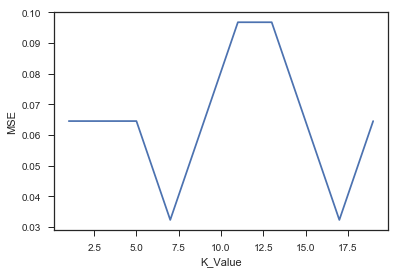

In [430]:
#Validation_df.plot(x='K_Vaue', y='MSE')

plt.plot(Validation_df['K_Value'], Validation_df['MSE'])
plt.xlabel('K_Value')
plt.ylabel('MSE')
plt.show()

# Naive Bayes with Iris Data

In [431]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [432]:
# X, Y split already done above

In [433]:
#Check the dataset
X.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,5.7,2.9,4.2,1.3
79,5.7,2.6,3.5,1.0
114,5.8,2.8,5.1,2.4
68,6.2,2.2,4.5,1.5
75,6.6,3.0,4.4,1.4
72,6.3,2.5,4.9,1.5
65,6.7,3.1,4.4,1.4
71,6.1,2.8,4.0,1.3
10,5.4,3.7,1.5,0.2
56,6.3,3.3,4.7,1.6


In [434]:
Y.sample(10)

9      0
78     1
114    2
108    2
57     1
50     1
93     1
51     1
142    2
127    2
Name: Species, dtype: int64

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

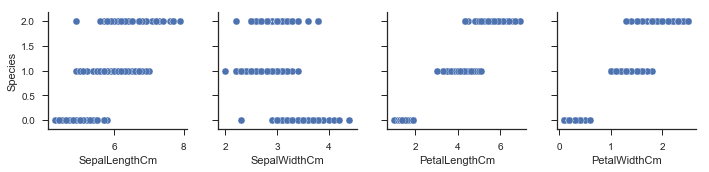

In [435]:
XCols = Iris_data.columns[0:-1].values
YCols = Iris_data.columns[-1:].values
sns.pairplot(Iris_data, x_vars=XCols, y_vars=YCols)

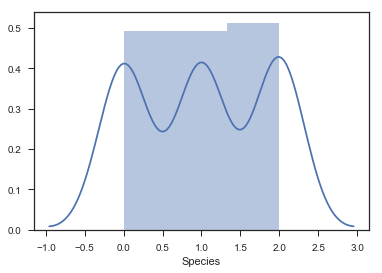

In [436]:
sns.distplot(Iris_data['Species'])

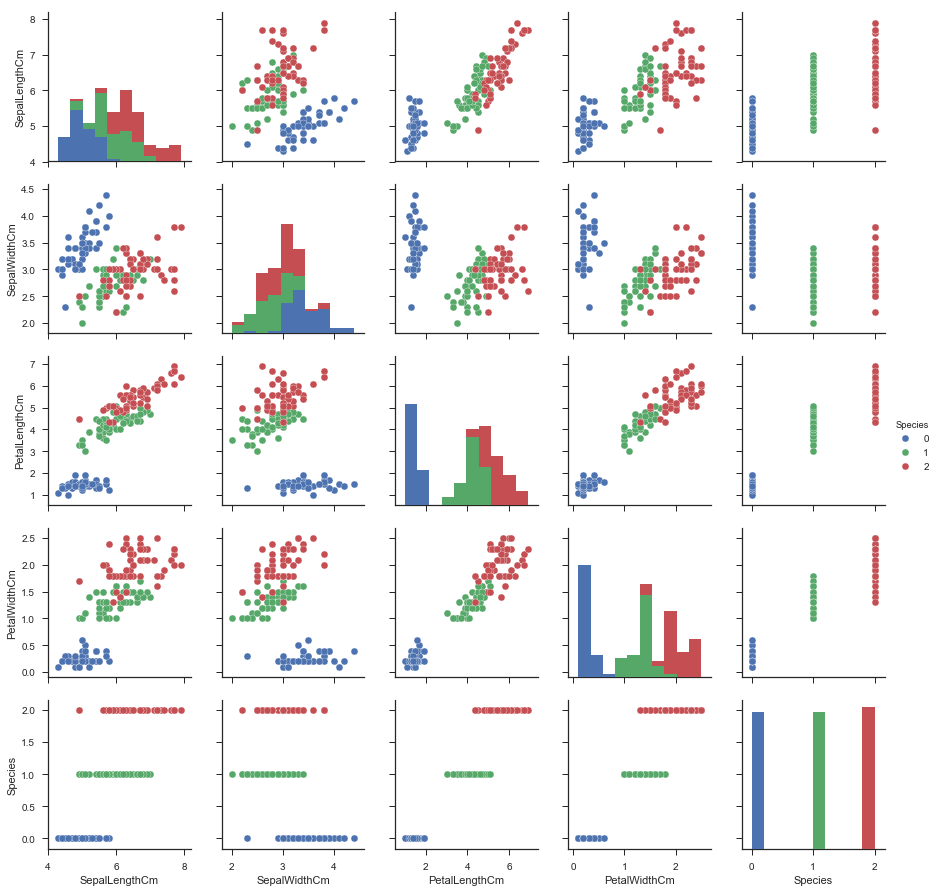

In [437]:
#Iris_data.hist(by='Species')
sns.pairplot(Iris_data, diag_kind='hist', hue="Species")

In [438]:
#Drop Id variable from data
# ID Column already dropped

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245B80B5860>,
      dtype=object)

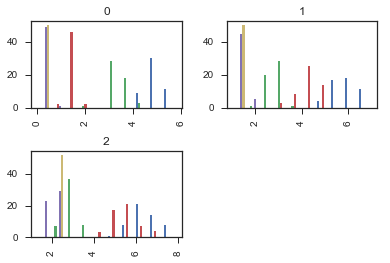

In [439]:
#sns.countplot(Iris_data['SepalLengthCm'], hue = Iris_data['Species'])
Iris_data.hist(by='Species')

## Observations:
###   The Species data have equally distributed datas in all species category. So there will be no bias towards a particualr species category.

### Question 12 
Find Correlation among all variables and give your insights 

In [440]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [441]:
# Already given the observation above...

### Split data in Training and test set in 80:20.

In [442]:
# Already splitted the data
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (121, 4)
Y_train shape:  (121,)
X_test shape:  (31, 4)
Y_test shape:  (31,)


### Question 13 
Do Feature Scaling 

In [443]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# doing feature scaling only to the dependent variables.
scaled_data = scaler.fit_transform(Iris_data.iloc[:,0:-1])
scaled_data

array([[-0.90675025,  1.04046305, -1.35363195, -1.32500785],
       [-1.15069013, -0.12412004, -1.35363195, -1.32500785],
       [-1.39463002,  0.3417132 , -1.41083297, -1.32500785],
       [-1.51659997,  0.10879658, -1.29643094, -1.32500785],
       [-1.02872019,  1.27337967, -1.35363195, -1.32500785],
       [-0.54084041,  1.97212952, -1.1820289 , -1.06087514],
       [-1.51659997,  0.80754643, -1.35363195, -1.1929415 ],
       [-1.02872019,  0.80754643, -1.29643094, -1.32500785],
       [-1.76053986, -0.35703666, -1.35363195, -1.32500785],
       [-1.15069013,  0.10879658, -1.29643094, -1.45707421],
       [-0.54084041,  1.50629629, -1.29643094, -1.32500785],
       [-1.27266008,  0.80754643, -1.23922992, -1.32500785],
       [-1.27266008, -0.12412004, -1.35363195, -1.45707421],
       [-1.8825098 , -0.12412004, -1.525235  , -1.45707421],
       [-0.05296063,  2.20504614, -1.46803399, -1.32500785],
       [-0.17493058,  3.13671261, -1.29643094, -1.06087514],
       [-0.54084041,  1.

In [444]:
X = scaled_data
Y = Iris_data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

### Question 14 
Train and Fit NaiveBayes Model

In [445]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None)

In [446]:
#Predict
expected = Y_test
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [447]:
# show Confusion Matrix
print(metrics.confusion_matrix(expected, predicted))

[[12  0  0]
 [ 0  7  0]
 [ 0  3  9]]


In [448]:
# show accuracy
accuracy_score(Y_test, predicted)

0.9032258064516129

In [449]:
#Show precision and Recall metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.70      1.00      0.82         7
          2       1.00      0.75      0.86        12

avg / total       0.93      0.90      0.90        31



## Observations:
### With Knn model (euclidean metric and K = 7 or 17) we have got the accuracy score of 0.967742.
### with NaiveBayes (StandaredScalar feature scaling) we have got the accuracy score of 0.9032258.

### We can go with the Knn model as it has better accuracy score.

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [450]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [451]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [452]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [453]:
# use from sklearn.svm import SVC

In [454]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [455]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [456]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [457]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 